# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Didi Prasetyo
- **Email:** didiprasetyo360@gmail.com
- **ID Dicoding:** didiprasetyo

## Menentukan Pertanyaan Bisnis

- How does weather affect bike rentals?
- what factors have the most influence on total rentals?
- when are the peak hours for bike rentals?

## Import Semua Packages/Library yang Digunakan

In [721]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [722]:
rent_by_day_df = pd.read_csv('data/day.csv')
rent_by_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [723]:
rent_by_hour_df = pd.read_csv('data/hour.csv')
rent_by_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai tabel `rent_by_day_df`

In [724]:
rent_by_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [725]:
rent_by_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [726]:
print("Jumlah duplikasi: ", rent_by_day_df.duplicated().sum())

Jumlah duplikasi:  0


In [727]:
season_filter = rent_by_day_df[(rent_by_day_df['season'] < 1) | (rent_by_day_df['season'] > 4)]
print("total invalid season:", len(season_filter))

total invalid season: 0


In [728]:
yr_filter = rent_by_day_df[(rent_by_day_df['yr'] < 0) | (rent_by_day_df['yr'] > 1)]
print("total invalid yr:", len(yr_filter))

total invalid yr: 0


In [729]:
mnth_filter = rent_by_day_df[(rent_by_day_df['mnth'] < 1) | (rent_by_day_df['mnth'] > 12)]
print("total invalid mnth:", len(mnth_filter))

total invalid mnth: 0


In [730]:
weekday_filter = rent_by_day_df[(rent_by_day_df['weekday'] < 0) | (rent_by_day_df['weekday'] > 6)]
print("total invalid weekday:", len(weekday_filter))

total invalid weekday: 0


In [731]:
workingday_filter = rent_by_day_df[(rent_by_day_df['workingday'] < 0) | (rent_by_day_df['workingday'] > 6)]
print("total invalid workingday:", len(workingday_filter))

total invalid workingday: 0


In [732]:
weathersit_filter = rent_by_day_df[(rent_by_day_df['weathersit'] < 0) | (rent_by_day_df['weathersit'] > 6)]
print("total invalid weathersit:", len(weathersit_filter))

total invalid weathersit: 0


In [733]:
q25, q75 = np.percentile(rent_by_day_df['temp'], 25), np.percentile(rent_by_day_df['temp'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in rent_by_day_df['temp'] if x < minimum or x > maximum]

print(outliers)

[]


total humidity outlier: 2
[0.187917, 0.0]


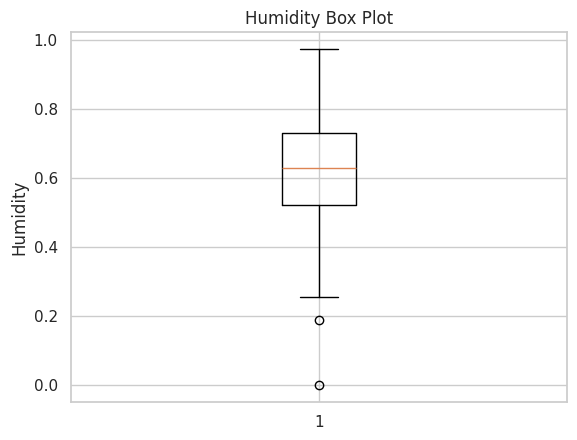

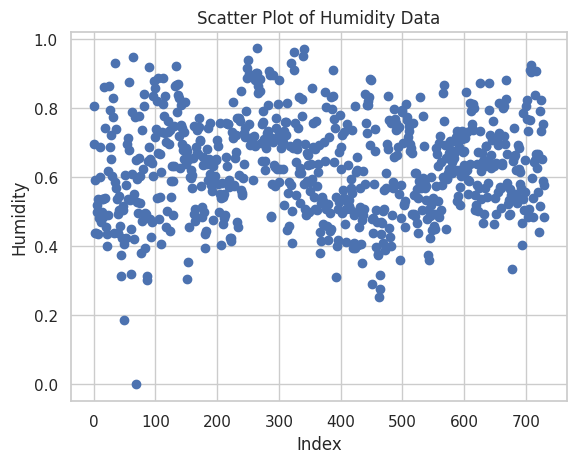

In [734]:
q25, q75 = np.percentile(rent_by_day_df['hum'], 25), np.percentile(rent_by_day_df['hum'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in rent_by_day_df['hum'] if x < minimum or x > maximum]

print("total humidity outlier:", len(outliers))
print(outliers)

# Plot box plot
plt.boxplot(rent_by_day_df['hum'])
plt.title("Humidity Box Plot")
plt.ylabel("Humidity")
plt.show()

# Scatter plot of Humidity
plt.scatter(rent_by_day_df.index, rent_by_day_df['hum'])
plt.title("Scatter Plot of Humidity Data")
plt.xlabel("Index")
plt.ylabel("Humidity")
plt.show()

total wind speed outlier: 13
[0.417908, 0.507463, 0.385571, 0.388067, 0.422275, 0.415429, 0.409212, 0.421642, 0.441563, 0.4148, 0.386821, 0.398008, 0.407346]


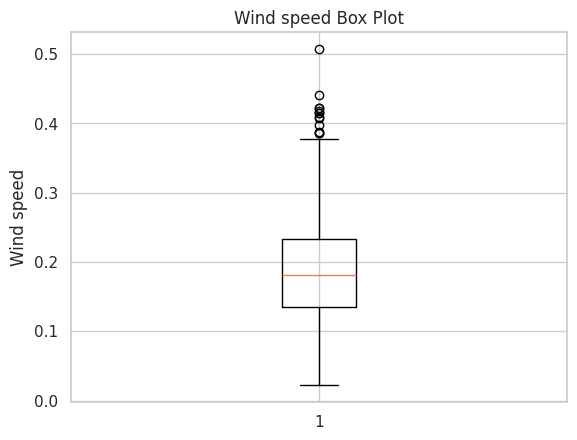

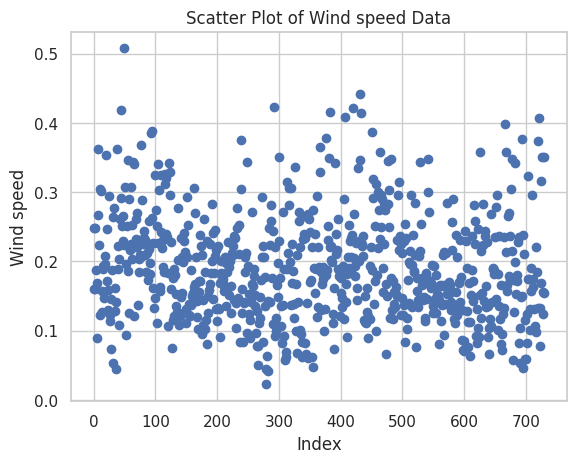

In [735]:
q25, q75 = np.percentile(rent_by_day_df['windspeed'], 25), np.percentile(rent_by_day_df['windspeed'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in rent_by_day_df['windspeed'] if x < minimum or x > maximum]

print("total wind speed outlier:", len(outliers))
print(outliers)

# Plot box plot
plt.boxplot(rent_by_day_df['windspeed'])
plt.title("Wind speed Box Plot")
plt.ylabel("Wind speed")
plt.show()

# Scatter plot of Wind speed
plt.scatter(rent_by_day_df.index, rent_by_day_df['windspeed'])
plt.title("Scatter Plot of Wind speed Data")
plt.xlabel("Index")
plt.ylabel("Wind speed")
plt.show()

In [736]:
rent_by_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- there is outlier data on column hum for huidity
- on column windspeed also has outlier data

#### Menilai tabel `rent_by_hour_df`

In [737]:
print("Jumlah duplikasi: ", rent_by_hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [738]:
season_filter = rent_by_hour_df[(rent_by_hour_df['season'] < 1) | (rent_by_hour_df['season'] > 4)]
print("total invalid season:", len(season_filter))

total invalid season: 0


In [739]:
yr_filter = rent_by_hour_df[(rent_by_hour_df['yr'] < 0) | (rent_by_hour_df['yr'] > 1)]
print("total invalid yr:", len(yr_filter))

total invalid yr: 0


In [740]:
mnth_filter = rent_by_hour_df[(rent_by_hour_df['mnth'] < 1) | (rent_by_hour_df['mnth'] > 12)]
print("total invalid mnth:", len(mnth_filter))

total invalid mnth: 0


In [741]:
weekday_filter = rent_by_hour_df[(rent_by_hour_df['weekday'] < 0) | (rent_by_hour_df['weekday'] > 6)]
print("total invalid weekday:", len(weekday_filter))

total invalid weekday: 0


In [742]:
workingday_filter = rent_by_hour_df[(rent_by_hour_df['workingday'] < 0) | (rent_by_hour_df['workingday'] > 6)]
print("total invalid workingday:", len(workingday_filter))

total invalid workingday: 0


In [743]:
weathersit_filter = rent_by_hour_df[(rent_by_hour_df['weathersit'] < 0) | (rent_by_hour_df['weathersit'] > 6)]
print("total invalid weathersit:", len(weathersit_filter))

total invalid weathersit: 0


In [744]:
q25, q75 = np.percentile(rent_by_hour_df['temp'], 25), np.percentile(rent_by_hour_df['temp'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in rent_by_hour_df['temp'] if x < minimum or x > maximum]

print(outliers)

[]


total humidity outlier: 22
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


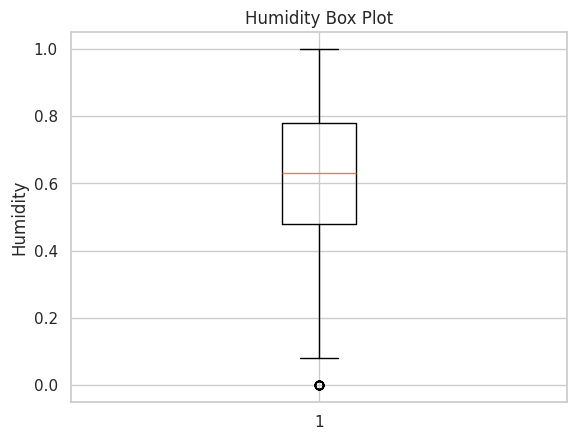

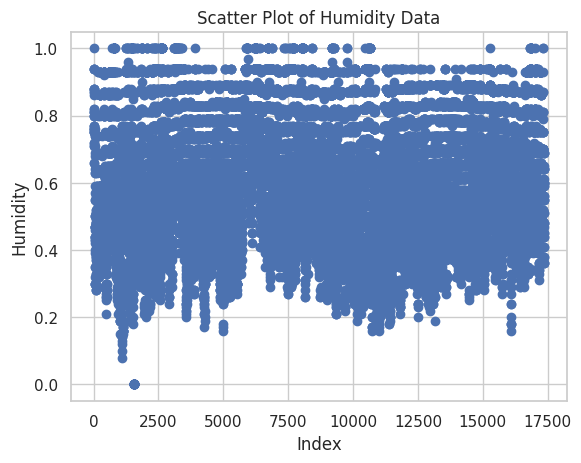

In [745]:
q25, q75 = np.percentile(rent_by_hour_df['hum'], 25), np.percentile(rent_by_hour_df['hum'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in rent_by_hour_df['hum'] if x < minimum or x > maximum]

print("total humidity outlier:", len(outliers))
print(outliers)

# Plot box plot
plt.boxplot(rent_by_hour_df['hum'])
plt.title("Humidity Box Plot")
plt.ylabel("Humidity")
plt.show()

# Scatter plot of Humidity
plt.scatter(rent_by_hour_df.index, rent_by_hour_df['hum'])
plt.title("Scatter Plot of Humidity Data")
plt.xlabel("Index")
plt.ylabel("Humidity")
plt.show()

total wind speed outlier: 342
[0.4925, 0.5522, 0.5224, 0.5224, 0.5821, 0.5224, 0.5821, 0.5821, 0.5224, 0.5224, 0.5522, 0.4925, 0.5522, 0.5224, 0.4925, 0.4925, 0.5522, 0.4925, 0.5224, 0.5821, 0.5224, 0.4925, 0.6567, 0.6119, 0.6119, 0.4925, 0.5224, 0.6567, 0.4925, 0.7761, 0.6866, 0.5224, 0.5821, 0.4925, 0.4925, 0.5224, 0.5821, 0.6567, 0.5821, 0.5821, 0.4925, 0.6119, 0.6567, 0.7463, 0.6418, 0.6119, 0.5224, 0.5522, 0.4925, 0.5522, 0.5522, 0.5522, 0.6119, 0.806, 0.7463, 0.4925, 0.6119, 0.4925, 0.6119, 0.6119, 0.4925, 0.5224, 0.5522, 0.5224, 0.4925, 0.4925, 0.6119, 0.5821, 0.5224, 0.5821, 0.4925, 0.4925, 0.4925, 0.6418, 0.4925, 0.4925, 0.5522, 0.5224, 0.6119, 0.4925, 0.5522, 0.4925, 0.5821, 0.4925, 0.4925, 0.4925, 0.5224, 0.4925, 0.5224, 0.5224, 0.5224, 0.5224, 0.4925, 0.5224, 0.4925, 0.5821, 0.5224, 0.5821, 0.5821, 0.5821, 0.5224, 0.5522, 0.5821, 0.4925, 0.4925, 0.4925, 0.6119, 0.5224, 0.5224, 0.5821, 0.4925, 0.5224, 0.4925, 0.4925, 0.5224, 0.4925, 0.8507, 0.8507, 0.4925, 0.4925, 0.6418, 0.

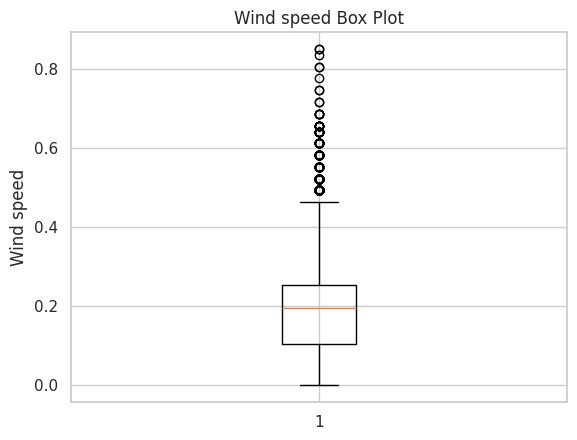

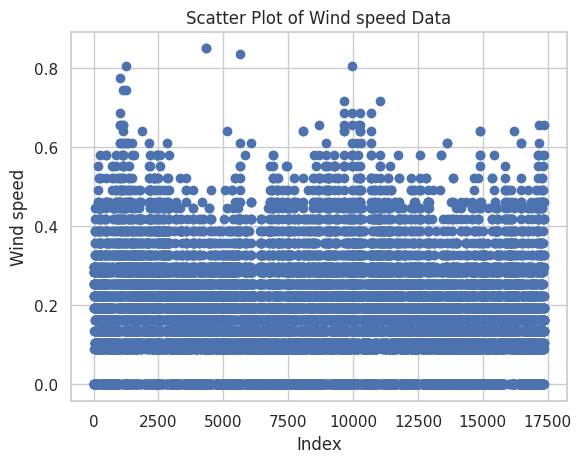

In [746]:
q25, q75 = np.percentile(rent_by_hour_df['windspeed'], 25), np.percentile(rent_by_hour_df['windspeed'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in rent_by_hour_df['windspeed'] if x < minimum or x > maximum]

print("total wind speed outlier:", len(outliers))
print(outliers)

# Plot box plot
plt.boxplot(rent_by_hour_df['windspeed'])
plt.title("Wind speed Box Plot")
plt.ylabel("Wind speed")
plt.show()

# Scatter plot of Wind speed
plt.scatter(rent_by_hour_df.index, rent_by_hour_df['windspeed'])
plt.title("Scatter Plot of Wind speed Data")
plt.xlabel("Index")
plt.ylabel("Wind speed")
plt.show()

In [747]:
hr_filter = rent_by_hour_df[(rent_by_hour_df['hr'] < 0) | (rent_by_hour_df['hr'] > 23)]
print("total invalid hr:", len(hr_filter))

total invalid hr: 0


In [748]:
rent_by_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `rent_by_day_df`

##### Outlier data `hum`

In [749]:
def check_outlier():
    q25, q75 = np.percentile(rent_by_day_df['hum'], 25), np.percentile(rent_by_day_df['hum'], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in rent_by_day_df['hum'] if x < minimum or x > maximum]
    total_outliers= len(outliers)
    
    return total_outliers
        
def replace_outlier():
    Q1 = rent_by_day_df['hum'].quantile(0.25)
    Q3 = rent_by_day_df['hum'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (rent_by_day_df['hum'] < lower_bound) | (rent_by_day_df['hum'] > upper_bound)
    
    rent_by_day_df['dteday'] = pd.to_datetime(rent_by_day_df['dteday'])
    rent_by_day_df['week'] = rent_by_day_df['dteday'].dt.isocalendar().week

    rent_by_day_df.loc[outliers, 'hum'] = rent_by_day_df.groupby('week')['hum'].transform(lambda x: x.mean())
    
loop=1
while True:
    replace_outlier()
    total_outliers = check_outlier()
    print("Loop {} Total outliers {}".format(loop, total_outliers))
    
    loop+=1
    if total_outliers <= 0 or loop >= 5:
        break



Loop 1 Total outliers 0


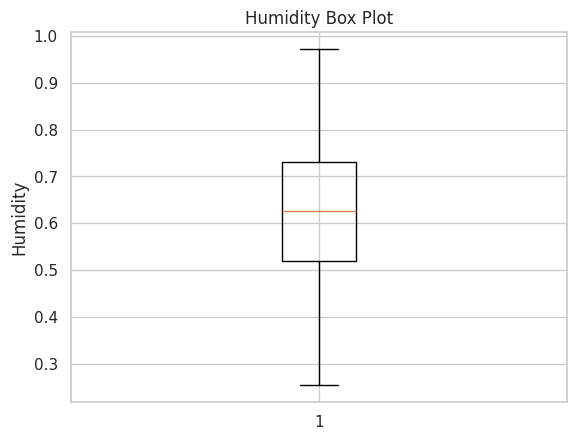

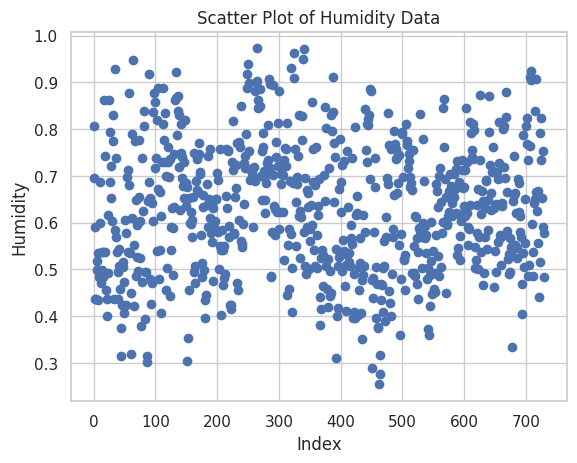

In [750]:
# Plot box plot
plt.boxplot(rent_by_day_df['hum'])
plt.title("Humidity Box Plot")
plt.ylabel("Humidity")
plt.show()

# Scatter plot of Humidity
plt.scatter(rent_by_day_df.index, rent_by_day_df['hum'])
plt.title("Scatter Plot of Humidity Data")
plt.xlabel("Index")
plt.ylabel("Humidity")
plt.show()

**Insight:**
- i use mean data to replace humidity that outlier

##### Outlier data `windspeed`

In [751]:
def check_outlier():
    q25, q75 = np.percentile(rent_by_day_df['windspeed'], 25), np.percentile(rent_by_day_df['windspeed'], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in rent_by_day_df['windspeed'] if x < minimum or x > maximum]
    total_outliers= len(outliers)
    
    return total_outliers
        
def replace_outlier():
    Q1 = rent_by_day_df['windspeed'].quantile(0.25)
    Q3 = rent_by_day_df['windspeed'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (rent_by_day_df['windspeed'] < lower_bound) | (rent_by_day_df['windspeed'] > upper_bound)
    
    rent_by_day_df['dteday'] = pd.to_datetime(rent_by_day_df['dteday'])
    rent_by_day_df['week'] = rent_by_day_df['dteday'].dt.isocalendar().week

    rent_by_day_df.loc[outliers, 'windspeed'] = rent_by_day_df.groupby('week')['windspeed'].transform(lambda x: x.mode()[0] if not x.mode().empty else x.mean())
    
loop=1
while True:
    replace_outlier()
    total_outliers = check_outlier()
    print("Loop {} Total outliers {}".format(loop, total_outliers))
    
    loop+=1
    if total_outliers <= 0 or loop >= 5:
        break

Loop 1 Total outliers 2
Loop 2 Total outliers 0


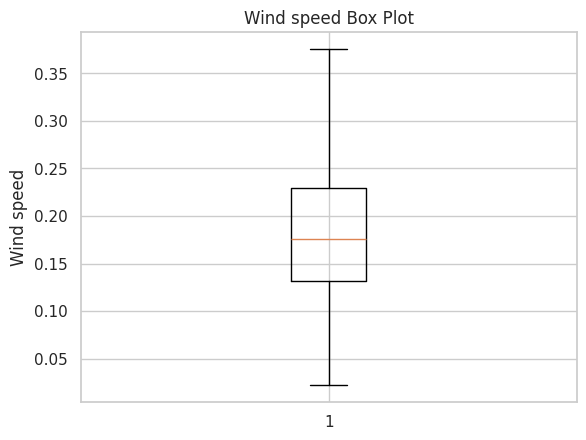

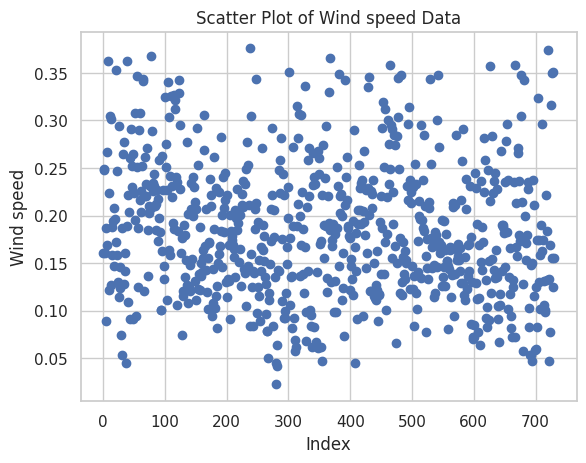

In [752]:
# Plot box plot
plt.boxplot(rent_by_day_df['windspeed'])
plt.title("Wind speed Box Plot")
plt.ylabel("Wind speed")
plt.show()

# Scatter plot of Wind speed
plt.scatter(rent_by_day_df.index, rent_by_day_df['windspeed'])
plt.title("Scatter Plot of Wind speed Data")
plt.xlabel("Index")
plt.ylabel("Wind speed")
plt.show()

**Insight:**
- i use interpolation data to replace windspeed that outlier

#### Membersihkan tabel `rent_by_hour_df`

##### Outlier data `hum`

In [753]:
def check_outlier():
    q25, q75 = np.percentile(rent_by_hour_df['hum'], 25), np.percentile(rent_by_hour_df['hum'], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in rent_by_hour_df['hum'] if x < minimum or x > maximum]
    total_outliers= len(outliers)
    
    return total_outliers
        
def replace_outlier():
    Q1 = rent_by_hour_df['hum'].quantile(0.25)
    Q3 = rent_by_hour_df['hum'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (rent_by_hour_df['hum'] < lower_bound) | (rent_by_hour_df['hum'] > upper_bound)
    
    rent_by_hour_df['dteday'] = pd.to_datetime(rent_by_hour_df['dteday'])
    rent_by_hour_df['week'] = rent_by_hour_df['dteday'].dt.isocalendar().week

    rent_by_hour_df.loc[outliers, 'hum'] = rent_by_hour_df.groupby('week')['hum'].transform(lambda x: x.mean())
    
loop=1
while True:
    replace_outlier()
    total_outliers = check_outlier()
    print("Loop {} Total outliers {}".format(loop, total_outliers))
    
    loop+=1
    if total_outliers <= 0 or loop >= 5:
        break



Loop 1 Total outliers 0


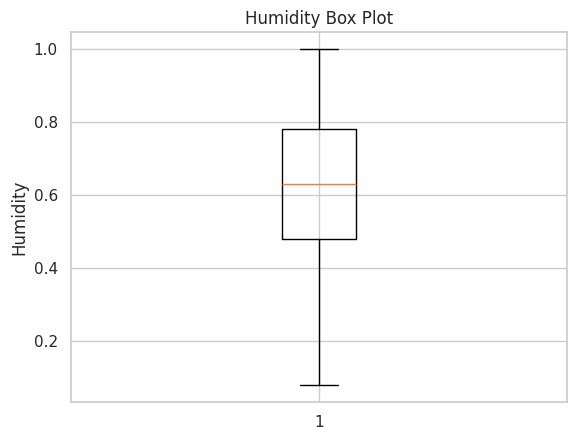

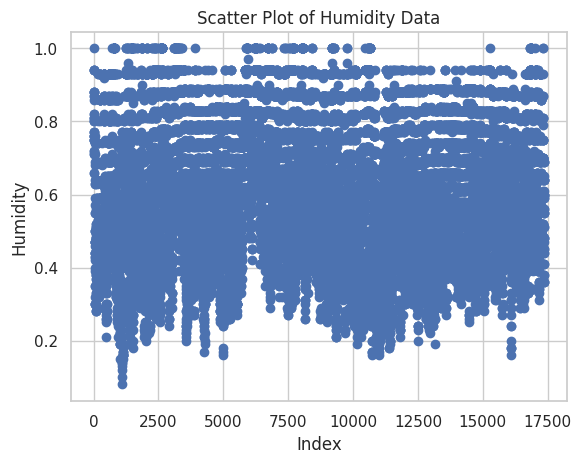

In [754]:
# Plot box plot
plt.boxplot(rent_by_hour_df['hum'])
plt.title("Humidity Box Plot")
plt.ylabel("Humidity")
plt.show()

# Scatter plot of Humidity
plt.scatter(rent_by_hour_df.index, rent_by_hour_df['hum'])
plt.title("Scatter Plot of Humidity Data")
plt.xlabel("Index")
plt.ylabel("Humidity")
plt.show()

**Insight:**
- i use n data to replace humidity that outlier

##### Outlier data `windspeed`

In [755]:
def check_outlier():
    q25, q75 = np.percentile(rent_by_hour_df['windspeed'], 25), np.percentile(rent_by_hour_df['windspeed'], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in rent_by_hour_df['windspeed'] if x < minimum or x > maximum]
    total_outliers= len(outliers)
    
    return total_outliers
        
def replace_outlier():
    Q1 = rent_by_hour_df['windspeed'].quantile(0.25)
    Q3 = rent_by_hour_df['windspeed'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (rent_by_hour_df['windspeed'] < lower_bound) | (rent_by_hour_df['windspeed'] > upper_bound)
    
    rent_by_hour_df['dteday'] = pd.to_datetime(rent_by_hour_df['dteday'])
    rent_by_hour_df['week'] = rent_by_hour_df['dteday'].dt.isocalendar().week

    rent_by_hour_df.loc[outliers, 'windspeed'] = rent_by_hour_df.groupby('week')['windspeed'].transform(lambda x: x.mode()[0] if not x.mode().empty else x.mean())
    
loop=1
while True:
    replace_outlier()
    total_outliers = check_outlier()
    print("Loop {} Total outliers {}".format(loop, total_outliers))
    
    loop+=1
    if total_outliers <= 0 or loop >= 5:
        break

Loop 1 Total outliers 0


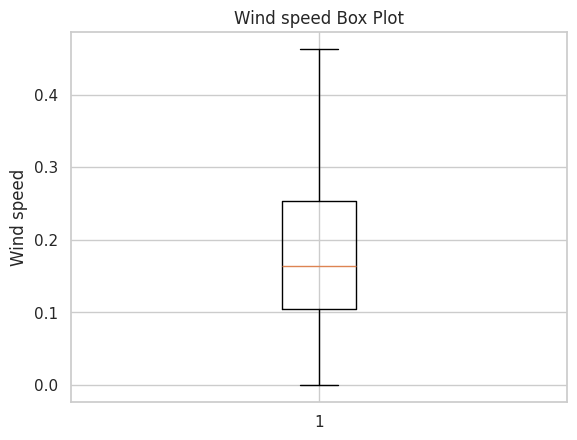

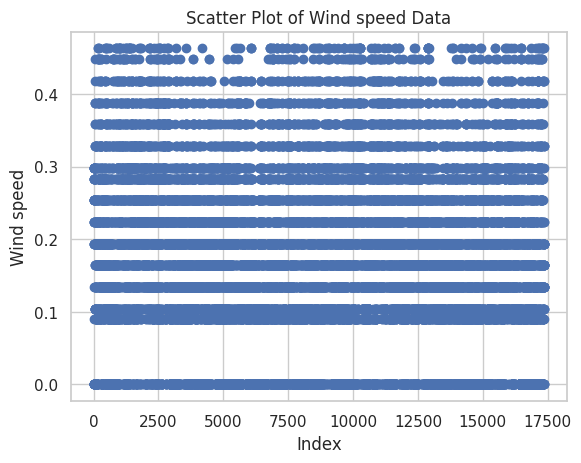

In [756]:
# Plot box plot
plt.boxplot(rent_by_hour_df['windspeed'])
plt.title("Wind speed Box Plot")
plt.ylabel("Wind speed")
plt.show()

# Scatter plot of Wind speed
plt.scatter(rent_by_hour_df.index, rent_by_hour_df['windspeed'])
plt.title("Scatter Plot of Wind speed Data")
plt.xlabel("Index")
plt.ylabel("Wind speed")
plt.show()

**Insight:**
- i use interpolation data to replace windspeed that outlier

## Exploratory Data Analysis (EDA)

### Explore `rent_by_day_df`

In [757]:
rent_by_day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,week
327,328,2011-11-24,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560,935,1495,47
294,295,2011-10-22,4,0,10,0,6,0,1,0.422500,0.425492,0.629167,0.092667,1499,2809,4308,42
402,403,2012-02-07,1,1,2,0,2,1,1,0.354167,0.361104,0.496250,0.147379,199,4176,4375,6
191,192,2011-07-11,3,0,7,0,1,1,1,0.762500,0.729804,0.635833,0.282337,723,3363,4086,28
585,586,2012-08-08,3,1,8,0,3,1,2,0.750000,0.707717,0.672917,0.110700,1263,6271,7534,32


In [758]:
rent_by_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,week
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628948,0.183978,848.176471,3656.172367,4504.348837,26.534884
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000,1.0
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.131538,315.500000,2497.000000,3152.000000,13.5
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.176000,713.000000,3662.000000,4548.000000,27.0
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.229279,1096.000000,4776.500000,5956.000000,40.0
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.375617,3410.000000,6946.000000,8714.000000,52.0
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.139787,0.071754,686.622488,1560.256377,1937.211452,15.076602


In [759]:
rent_by_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,week
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,52
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,52
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1


In [760]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
rent_by_day_df['season_label'] = rent_by_day_df['season'].map(season_mapping)
seasonal_counts = rent_by_day_df.groupby(by="season_label")['cnt'].count()

print(seasonal_counts)

season_label
Fall      188
Spring    181
Summer    184
Winter    178
Name: cnt, dtype: int64


In [761]:
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
rent_by_day_df['weekday_label'] = rent_by_day_df['weekday'].map(weekday_mapping)
weekday_counts = rent_by_day_df.groupby(by="weekday_label")['cnt'].count()

print(weekday_counts)

weekday_label
Friday       104
Monday       105
Saturday     105
Sunday       105
Thursday     104
Tuesday      104
Wednesday    104
Name: cnt, dtype: int64


In [762]:
weathersit_mapping = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
rent_by_day_df['weathersit_label'] = rent_by_day_df['weathersit'].map(weathersit_mapping)
weathersit_counts = rent_by_day_df.groupby(by="weathersit_label")['cnt'].count()

print(weathersit_counts)

weathersit_label
Clear              463
Light Snow/Rain     21
Misty              247
Name: cnt, dtype: int64


In [763]:
columns_of_interest = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'] 
correlation_matrix = rent_by_day_df[columns_of_interest].corr()

print("Correlation matrix:")
print(correlation_matrix['cnt'].sort_values(ascending=False))

Correlation matrix:
cnt           1.000000
atemp         0.631066
temp          0.627494
hum          -0.116230
windspeed    -0.186203
weathersit   -0.297391
Name: cnt, dtype: float64


In [764]:
monthly_cnt = rent_by_day_df.groupby(['yr', 'mnth']).agg({
    'casual': 'sum'
}).reset_index()

pivot_table_cnt = monthly_cnt.pivot_table(index='mnth', columns='yr', values='casual')
pivot_table_cnt.columns = ['2011_casual', '2012_casual']

print(pivot_table_cnt)

      2011_casual  2012_casual
mnth                          
1          3073.0       8969.0
2          6242.0       8721.0
3         12826.0      31618.0
4         22346.0      38456.0
5         31050.0      44235.0
6         30612.0      43294.0
7         36452.0      41705.0
8         28842.0      43197.0
9         26545.0      43778.0
10        25222.0      34538.0
11        15594.0      21009.0
12         8448.0      13245.0


In [765]:
monthly_cnt = rent_by_day_df.groupby(['yr', 'mnth']).agg({
    'registered': 'sum'
}).reset_index()

pivot_table_cnt = monthly_cnt.pivot_table(index='mnth', columns='yr', values='registered')
pivot_table_cnt.columns = ['2011_registered', '2012_registered']

print(pivot_table_cnt)

      2011_registered  2012_registered
mnth                                  
1             35116.0          87775.0
2             41973.0          94416.0
3             51219.0         133257.0
4             72524.0         135768.0
5            104771.0         151630.0
6            112900.0         159536.0
7            104889.0         161902.0
8            107849.0         171306.0
9            100873.0         174795.0
10            98289.0         164303.0
11            86573.0         131655.0
12            78875.0         110468.0


**Insight:**
- xxx
- xxx

### Explore `rent_by_hour_df`

In [766]:
hourly_rentals = rent_by_hour_df.groupby('hr')['cnt'].sum().reset_index()
sorted_hourly_rentals = hourly_rentals.sort_values(by='cnt', ascending=False).head(3)

print(sorted_hourly_rentals)

    hr     cnt
17  17  336860
18  18  309772
8    8  261001


In [767]:
hourly_rentals = rent_by_hour_df.groupby('hr')['casual'].sum().reset_index()
sorted_hourly_rentals = hourly_rentals.sort_values(by='casual', ascending=False).head(3)

print(sorted_hourly_rentals)

    hr  casual
14  14   55089
15  15   54606
17  17   54220


In [768]:
hourly_rentals = rent_by_hour_df.groupby('hr')['registered'].sum().reset_index()
sorted_hourly_rentals = hourly_rentals.sort_values(by='registered', ascending=False).head(3)

print(sorted_hourly_rentals)

    hr  registered
17  17      282640
18  18      265276
8    8      245240


In [769]:

weekdays_df = rent_by_hour_df[rent_by_hour_df['weekday'].isin([1, 2, 3, 4, 5])]
weekends_df = rent_by_hour_df[rent_by_hour_df['weekday'].isin([0, 6])]

hourly_rentals = rent_by_hour_df.groupby('hr')['cnt'].sum().reset_index()
sorted_hourly_rentals = hourly_rentals.sort_values(by='cnt', ascending=False).head(3)

hourly_rentals_weekdays = weekdays_df.groupby('hr')['cnt'].sum().reset_index()
sorted_hourly_rentals_weekdays = hourly_rentals_weekdays.sort_values(by='cnt', ascending=False).head(3)

hourly_rentals_weekends = weekdays_df.groupby('hr')['cnt'].sum().reset_index()
sorted_hourly_rentals_weekends = hourly_rentals_weekends.sort_values(by='cnt', ascending=False).head(3)

print("All days")
print(sorted_hourly_rentals)

print("\nWeekdays")
print(sorted_hourly_rentals_weekdays)

print("\nWeekends")
print(sorted_hourly_rentals_weekends)

All days
    hr     cnt
17  17  336860
18  18  309772
8    8  261001

Weekdays
    hr     cnt
17  17  268276
18  18  250773
8    8  240176

Weekends
    hr     cnt
17  17  268276
18  18  250773
8    8  240176


In [770]:

weekdays_df = rent_by_hour_df[rent_by_hour_df['weekday'].isin([1, 2, 3, 4, 5])]
weekends_df = rent_by_hour_df[rent_by_hour_df['weekday'].isin([0, 6])]

hourly_rentals = rent_by_hour_df.groupby('hr')['casual'].sum().reset_index()
sorted_hourly_rentals = hourly_rentals.sort_values(by='casual', ascending=False).head(3)

hourly_rentals_weekdays = weekdays_df.groupby('hr')['casual'].sum().reset_index()
sorted_hourly_rentals_weekdays = hourly_rentals_weekdays.sort_values(by='casual', ascending=False).head(3)

hourly_rentals_weekends = weekdays_df.groupby('hr')['casual'].sum().reset_index()
sorted_hourly_rentals_weekends = hourly_rentals_weekends.sort_values(by='casual', ascending=False).head(3)

print("All days")
print(sorted_hourly_rentals)

print("\nWeekdays")
print(sorted_hourly_rentals_weekdays)

print("\nWeekends")
print(sorted_hourly_rentals_weekends)

All days
    hr  casual
14  14   55089
15  15   54606
17  17   54220

Weekdays
    hr  casual
17  17   29972
18  18   26387
16  16   25952

Weekends
    hr  casual
17  17   29972
18  18   26387
16  16   25952


In [771]:

weekdays_df = rent_by_hour_df[rent_by_hour_df['weekday'].isin([1, 2, 3, 4, 5])]
weekends_df = rent_by_hour_df[rent_by_hour_df['weekday'].isin([0, 6])]

hourly_rentals = rent_by_hour_df.groupby('hr')['registered'].sum().reset_index()
sorted_hourly_rentals = hourly_rentals.sort_values(by='registered', ascending=False).head(3)

hourly_rentals_weekdays = weekdays_df.groupby('hr')['registered'].sum().reset_index()
sorted_hourly_rentals_weekdays = hourly_rentals_weekdays.sort_values(by='registered', ascending=False).head(3)

hourly_rentals_weekends = weekdays_df.groupby('hr')['registered'].sum().reset_index()
sorted_hourly_rentals_weekends = hourly_rentals_weekends.sort_values(by='registered', ascending=False).head(3)

print("All days")
print(sorted_hourly_rentals)

print("\nWeekdays")
print(sorted_hourly_rentals_weekdays)

print("\nWeekends")
print(sorted_hourly_rentals_weekends)

All days
    hr  registered
17  17      282640
18  18      265276
8    8      245240

Weekdays
    hr  registered
17  17      238304
8    8      228637
18  18      224386

Weekends
    hr  registered
17  17      238304
8    8      228637
18  18      224386


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### How does weather affect bike rentals:

/tmp/ipykernel_107493/682680625.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_rentals, x='weathersit', y='cnt', palette='viridis')


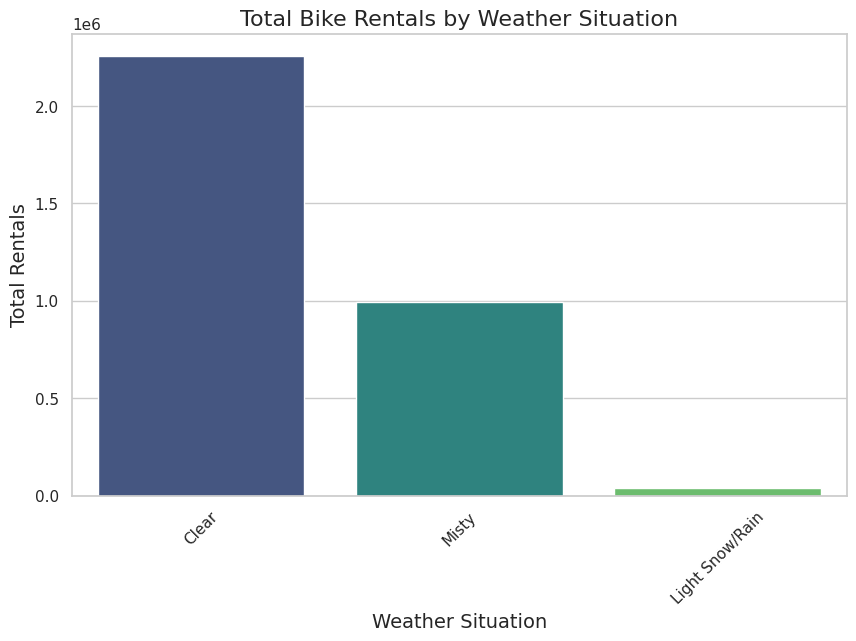

In [772]:
weather_rentals = rent_by_day_df.groupby('weathersit')['cnt'].sum().reset_index()

weather_rentals['weathersit'] = weather_rentals['weathersit'].map({
    1: 'Clear', 
    2: 'Misty', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow'
})

weather_rentals = weather_rentals.sort_values(by='cnt', ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=weather_rentals, x='weathersit', y='cnt', palette='viridis')

plt.title('Total Bike Rentals by Weather Situation', fontsize=16)
plt.xlabel('Weather Situation', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)

plt.xticks(rotation=45)
plt.show()

### What factors have the most influence on total rentals:

Correlation matrix for all users:
cnt           1.000000
atemp         0.631066
temp          0.627494
hum          -0.116230
windspeed    -0.186203
weathersit   -0.297391
Name: cnt, dtype: float64


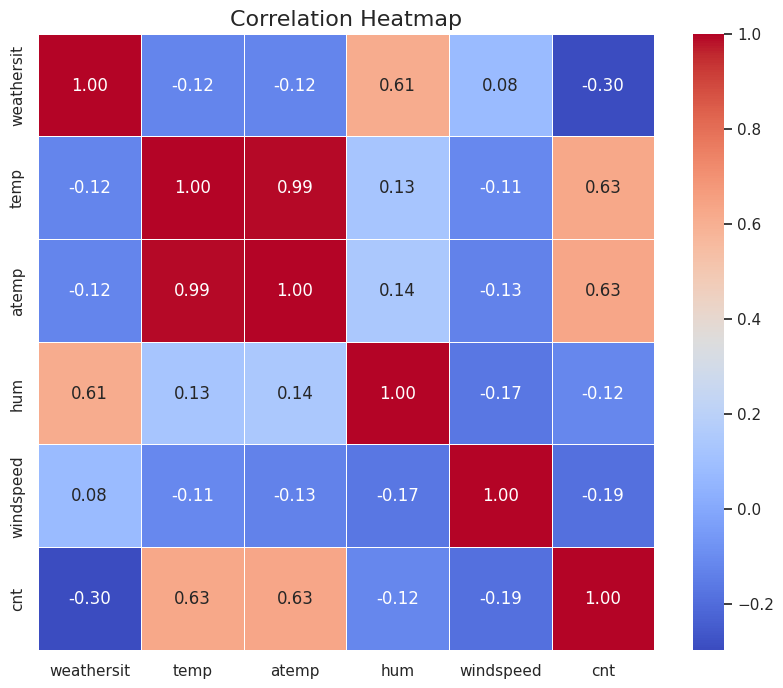

In [773]:
columns_of_interest = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'] 
correlation_matrix = rent_by_day_df[columns_of_interest].corr()

print("Correlation matrix for all users:")
print(correlation_matrix['cnt'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### When are the peak hours for bike rentals:

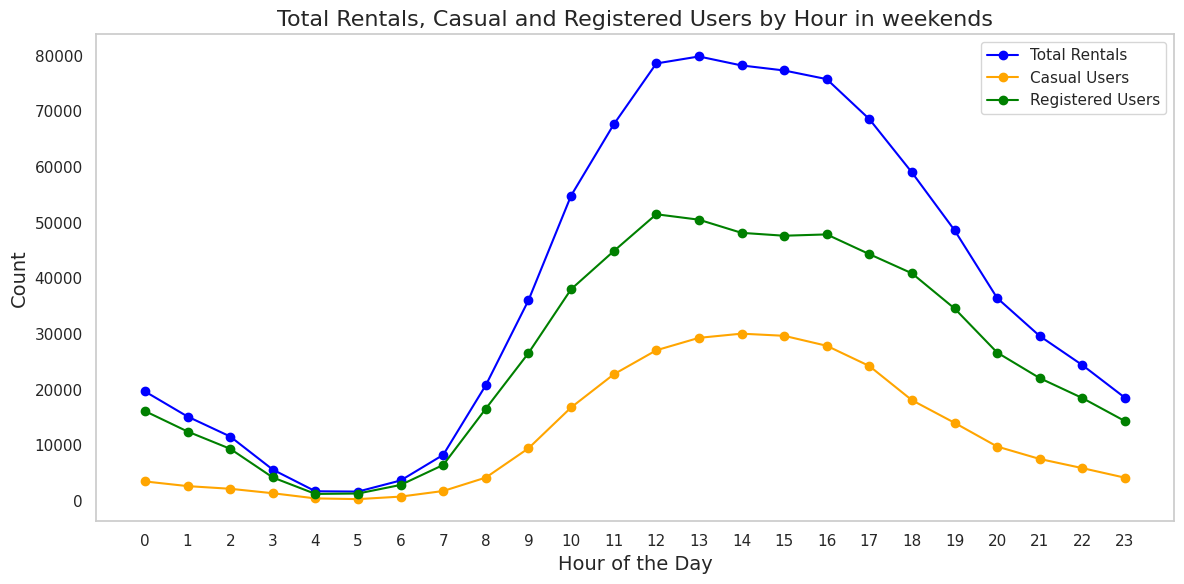

In [774]:
weekends_df = rent_by_hour_df[rent_by_hour_df['weekday'].isin([0, 6])]

hourly_data = weekends_df.groupby('hr').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['hr'], hourly_data['cnt'], label='Total Rentals', color='blue', marker='o')
plt.plot(hourly_data['hr'], hourly_data['casual'], label='Casual Users', color='orange', marker='o')
plt.plot(hourly_data['hr'], hourly_data['registered'], label='Registered Users', color='green', marker='o')

# Adding titles and labels
plt.title('Total Rentals, Casual and Registered Users by Hour in weekends', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(hourly_data['hr'])  # Ensure all hours are shown
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


**Insight:**
- by user type or all users has the same peak hour
- peak hour 1pm until 4pm

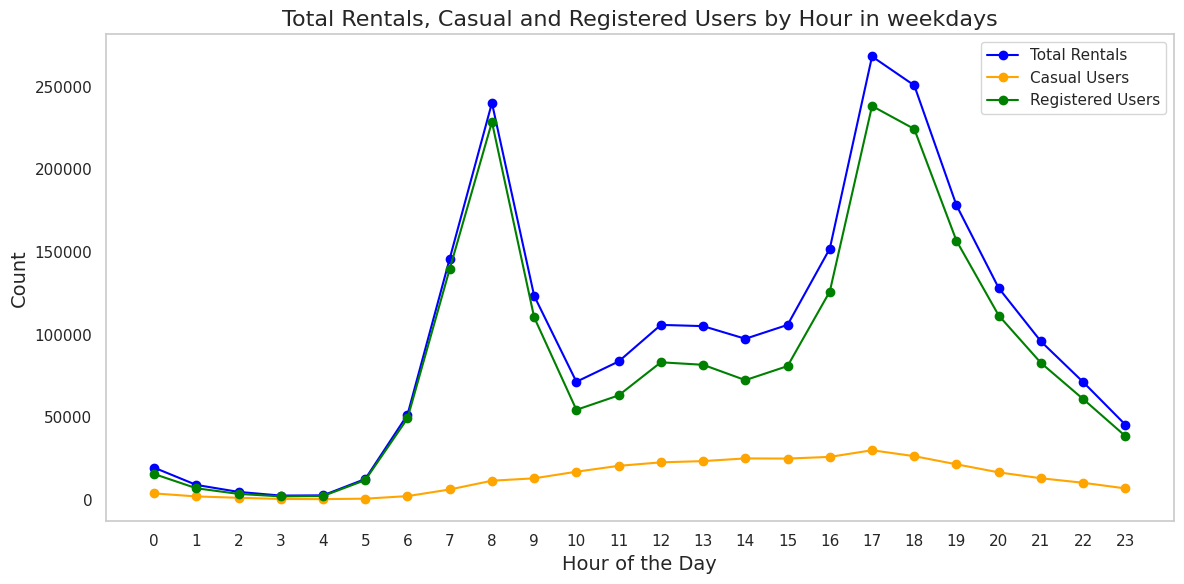

In [775]:
weekdays_df = rent_by_hour_df[rent_by_hour_df['weekday'].isin([1, 2, 3, 4, 5])]

hourly_data = weekdays_df.groupby('hr').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['hr'], hourly_data['cnt'], label='Total Rentals', color='blue', marker='o')
plt.plot(hourly_data['hr'], hourly_data['casual'], label='Casual Users', color='orange', marker='o')
plt.plot(hourly_data['hr'], hourly_data['registered'], label='Registered Users', color='green', marker='o')

# Adding titles and labels
plt.title('Total Rentals, Casual and Registered Users by Hour in weekdays', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(hourly_data['hr'])  # Ensure all hours are shown
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


**Insight:**
- by user type or all users has the same peak hour
- peak hour 8am and 5pm

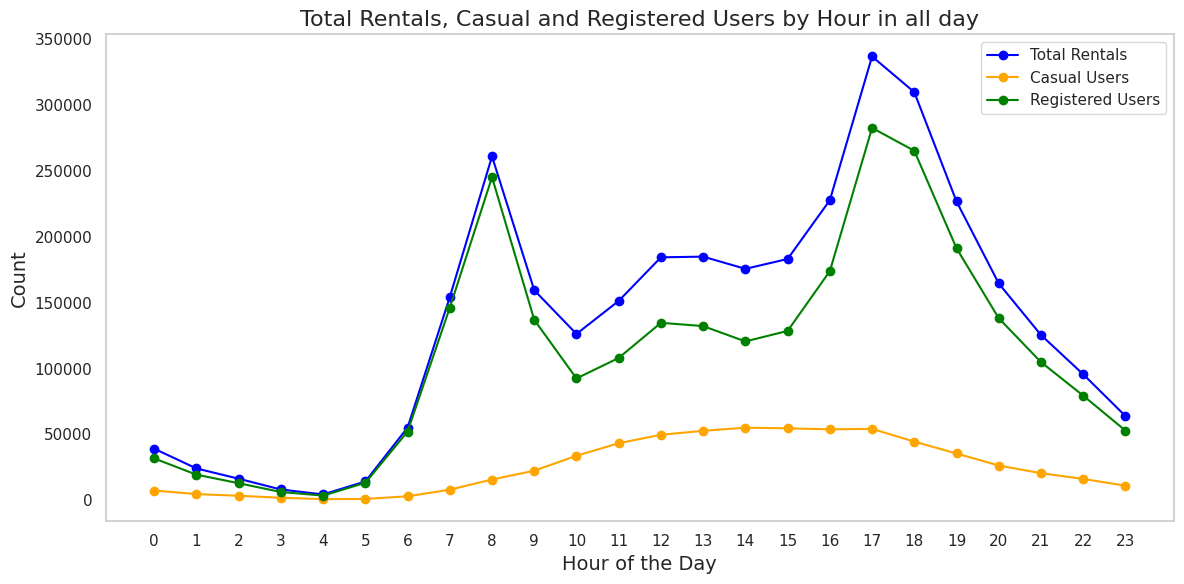

In [776]:
hourly_data = rent_by_hour_df.groupby('hr').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['hr'], hourly_data['cnt'], label='Total Rentals', color='blue', marker='o')
plt.plot(hourly_data['hr'], hourly_data['casual'], label='Casual Users', color='orange', marker='o')
plt.plot(hourly_data['hr'], hourly_data['registered'], label='Registered Users', color='green', marker='o')

# Adding titles and labels
plt.title('Total Rentals, Casual and Registered Users by Hour in all day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(hourly_data['hr'])  # Ensure all hours are shown
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


**Insight:**
- by user type or all users has the same peak hour
- peak hour 8am and 5pm

## Analisis Lanjutan (Opsional)

In [777]:
rent_by_day_df['dteday'] = pd.to_datetime(rent_by_day_df['dteday'])

analysis_date = rent_by_day_df['dteday'].max()

recency_registered = (analysis_date - rent_by_day_df[rent_by_day_df['registered'] > 0]['dteday']).dt.days
recency_casual = (analysis_date - rent_by_day_df[rent_by_day_df['casual'] > 0]['dteday']).dt.days

frequency_registered = rent_by_day_df['registered'].sum()
frequency_casual = rent_by_day_df['casual'].sum()

monetary_registered = rent_by_day_df['cnt'].sum()
monetary_casual = rent_by_day_df['cnt'].sum()

rfm_df = pd.DataFrame({
    'User_Type': ['Registered', 'Casual'],
    'Recency': [recency_registered.mean(), recency_casual.mean()],
    'Frequency': [frequency_registered, frequency_casual],
    'Monetary': [monetary_registered, monetary_casual]
})

print(rfm_df)


    User_Type  Recency  Frequency  Monetary
0  Registered    365.0    2672662   3292679
1      Casual    365.0     620017   3292679
